In [1]:
!pip install librosa

     |████████████████████████████████| 183 kB 431 kB/s eta 0:00:01
     |████████████████████████████████| 377 kB 1.2 MB/s eta 0:00:01
     |████████████████████████████████| 323 kB 1.3 MB/s eta 0:00:01
     |████████████████████████████████| 51 kB 34 kB/s  eta 0:00:01
  Created wheel for librosa: filename=librosa-0.8.0-py3-none-any.whl size=201376 sha256=ca5d6d128dbecb419a9dfc3e9bfaab94f1cd67ff5feed8172f0b6944214ad412
  Stored in directory: /home/dhakad/.cache/pip/wheels/aa/5a/92/d52f6f8560ff05a2525e6030a1903412df876714241fb76802
  Created wheel for audioread: filename=audioread-2.1.9-py3-none-any.whl size=23140 sha256=336185930ce8d9c0a696200321cd965615ea7e9bc1215c9cdf13135322e6eb5e
  Stored in directory: /home/dhakad/.cache/pip/wheels/49/5a/e4/df590783499a992a88de6c0898991d1167453a3196d0d1eeb7
  Created wheel for resampy: filename=resampy-0.2.2-py3-none-any.whl size=320718 sha256=2f289be063d6d7c7540b0fdf19091407796bcc648379964f4e56c525605889d9
  Stored in directory: /home/dhakad/.ca

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
filename="UrbanSound8K/dog_bark.wav"

In [3]:
import IPython.display as ipd
import librosa
import librosa.display

In [4]:
!dir

AudioClassification\ -\ Data_Preprocessing\ &\ Model\ Building.ipynb
AudioClassification\ -\ EDA.ipynb
saved_models
UrbanSound8K


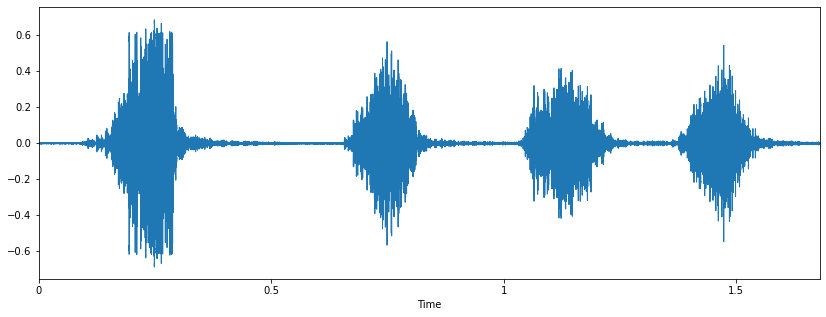

In [5]:
# Dog Sound

plt.figure(figsize=(14,5))
data, sample_rate = librosa.load(filename)
librosa.display.waveplot(data, sr = sample_rate)
ipd.Audio(filename)

 **Sampling rate or sampling frequency defines the number of samples per second (or per other unit) taken from a continuous signal to make a discrete or digital signal.** 

In [18]:
sample_rate

22050

##### by default , when we are reading with the help of librosa, then we are reading the signals with sample_rate of 22050

In [20]:
#using scipy

from scipy.io import wavfile as wav
wave_sample_rate,wave_audio = wav.read(filename)

In [21]:
wave_sample_rate

48000

In [23]:
wave_audio       # if we combine these values then will formed wave.....

array([  3,  -3, -15, ...,  21,   4, -16], dtype=int16)

In [25]:
data        #normalized

array([ 2.2728866e-05, -4.2073693e-04, -9.0678880e-04, ...,
        9.9527719e-04,  1.2307205e-03,  1.1918487e-04], dtype=float32)

# Difference btw Librosa and scipy :
    
    1) Librosa tries to converge the signal, it actually makes one signal( mono ). but scipy can't do this
    
    2) Librosa can represent an audio signal with respect to a normalized pattern (btw -1 to 1),so the regular pattern is observed from all files.  but scipy does not give normalised data
    
    3) Librosa by default convert sample rate into 22050

In [27]:
import pandas as pd

In [29]:
metadata = pd.read_csv("UrbanSound8K/metadata/UrbanSound8K.csv")
metadata.head(10)

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.000000,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.500000,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.500000,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.000000,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.500000,72.500000,1,5,2,children_playing
5,100263-2-0-143.wav,100263,71.500000,75.500000,1,5,2,children_playing
6,100263-2-0-161.wav,100263,80.500000,84.500000,1,5,2,children_playing
7,100263-2-0-3.wav,100263,1.500000,5.500000,1,5,2,children_playing
8,100263-2-0-36.wav,100263,18.000000,22.000000,1,5,2,children_playing
9,100648-1-0-0.wav,100648,4.823402,5.471927,2,10,1,car_horn


In [30]:
metadata[metadata["class"]=="dog_bark"].head(5)

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
14,100652-3-0-0.wav,100652,0.0,4.000000,1,2,3,dog_bark
15,100652-3-0-1.wav,100652,0.5,4.500000,1,2,3,dog_bark
16,100652-3-0-2.wav,100652,1.0,5.000000,1,2,3,dog_bark
17,100652-3-0-3.wav,100652,1.5,5.500000,1,2,3,dog_bark


In [32]:
# check whether dataset is balanced or imbalanced 
metadata["class"].value_counts()

engine_idling       1000
children_playing    1000
drilling            1000
street_music        1000
air_conditioner     1000
dog_bark            1000
jackhammer          1000
siren                929
car_horn             429
gun_shot             374
Name: class, dtype: int64